<img src="https://img.shields.io/badge/open%20in-nbviewer-blue.svg?style=flat-square" alt="made with python">

[nbviewer link](https://nbviewer.jupyter.org/github/msank00/fastai_ml/blob/master/fastai_ml_lecture_1_Random_Forest.ipynb)

# Use fastai for ml in google colab

- [course notebook](https://github.com/fastai/fastai/blob/master/courses/ml1/lesson1-rf.ipynb)


## Disclaimer:

This notebook is meant for running in google colab.   

## Notes

- The `fastai` ml related packages are available in fastai version `0.7`. The default 
`fastai` installed in Google Colab has version `>1.0`
- So for fastai ml,  install version `0.7` in google colab using `!pip install fastai==0.7.0`. Symbol `!` helps
to run any `bash cmd` in the jupyter cell.
- Uploading files in google colab is little tricky and some browser may give error. Better use 
google chrome. File loading code snippet

```py
from google.colab import files
files.upload()
```

**Remember:** The manually installed packages are available for this session only. If you want to run the same notebook later, you need to go through the painful task of package installation again.

Good luck and happy coding :)

In [0]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 6.5MB/s 
     |████████████████████████████████| 496.4MB 43kB/s 
     |████████████████████████████████| 1.5MB 10.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: fastai 1.0.54
    Uninstalling fastai-1.0.54:
      Successfully uninstalled fastai-1.0.54


In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics


In [0]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


## Download data

- Download [Bulldozer Data from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data)
- Upload the data to google colab using following code snippet (uncomment and run)
- Unzip the data-set
- Check data path and set `PATH`

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#!unzip bluebook-for-bulldozers.zip

In [0]:
#!unzip Train.zip

In [37]:
PATH = "/content/"
!ls -lrth {PATH}

total 364M
-rw-r--r-- 1 root root 112M Jan 24  2013  Train.csv
-rw-r--r-- 1 root root 297K Apr 28  2018  Valid.zip
-rw-r--r-- 1 root root 316K Apr 28  2018  ValidSolution.csv
-rw-r--r-- 1 root root 3.2M Apr 28  2018  Valid.csv
-rw-r--r-- 1 root root 210K Apr 28  2018  Valid.7z
-rw-r--r-- 1 root root 9.3M Apr 28  2018  Train.zip
-rw-r--r-- 1 root root 9.6M Apr 28  2018  TrainAndValid.zip
-rw-r--r-- 1 root root 7.1M Apr 28  2018  TrainAndValid.7z
-rw-r--r-- 1 root root 3.4M Apr 28  2018  Test.csv
-rw-r--r-- 1 root root 207K Apr 28  2018  random_forest_benchmark_test.csv
-rw-r--r-- 1 root root 193K Apr 28  2018  median_benchmark.csv
-rw-r--r-- 1 root root  11K Apr 28  2018 'Data Dictionary.xlsx'
-rw-r--r-- 1 root root 115M Apr 28  2018  TrainAndValid.csv
-rw-r--r-- 1 root root 6.9M Apr 28  2018  Train.7z
-rw-r--r-- 1 root root  50M Apr 28  2018  Machine_Appendix.csv
drwxr-xr-x 1 root root 4.0K Jul  3 16:14  sample_data
-rw-r--r-- 1 root root  49M Jul 13 09:36  bluebook-for-bulldozers.zip


## Note

After this point everything is pretty straight forward. Just copy pasting the node snippet from the original fastai ml notebook. For all the remaining notebooks in ml category, the google colab setup will be pretty much same.

In [0]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [40]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [42]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [43]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [0]:
train_cats(df_raw)

In [45]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [46]:
%%time
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

CPU times: user 3.42 ms, sys: 2.02 ms, total: 5.44 ms
Wall time: 13.2 ms


In [0]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

## Cheking Null Percentage (%)

In [49]:
display_all(df_raw.isnull().sum().sort_index()/(len(df_raw)*0.01))

Backhoe_Mounting            80.387161
Blade_Extension             93.712932
Blade_Type                  80.097725
Blade_Width                 93.712932
Coupler                     46.662013
Coupler_System              89.165971
Differential_Type           82.695918
Drive_System                73.982923
Enclosure                    0.081022
Enclosure_Type              93.712932
Engine_Horsepower           93.712932
Forks                       52.115425
Grouser_Tracks              89.189903
Grouser_Type                75.281271
Hydraulics                  20.082269
Hydraulics_Flow             89.189903
MachineHoursCurrentMeter    64.408850
MachineID                    0.000000
ModelID                      0.000000
Pad_Type                    80.271985
Pattern_Changer             75.265067
ProductGroup                 0.000000
ProductGroupDesc             0.000000
ProductSize                 52.545964
Pushblock                   93.712932
Ride_Control                62.952696
Ripper      

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

## Preprocessing

In [0]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [53]:
%%time
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 41s, sys: 442 ms, total: 1min 41s
Wall time: 53.9 s


In [54]:
m.score(df,y)

0.9830487095961269

In [55]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## Random Forest Base Model

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [57]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 34s, sys: 170 ms, total: 1min 34s
Wall time: 49.3 s
[0.0906079454886984, 0.24991607991514328, 0.9828419712144546, 0.8884585273277041]


## Speeding things up

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [59]:

m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.71 s, sys: 8.04 ms, total: 2.72 s
Wall time: 1.48 s
[0.11276000939973803, 0.35010786839028346, 0.9724067314135066, 0.7810969984452347]


## Single Tree

In [60]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.524844782894016, 0.5803561683042704, 0.40220165194904045, 0.39849785089046785]


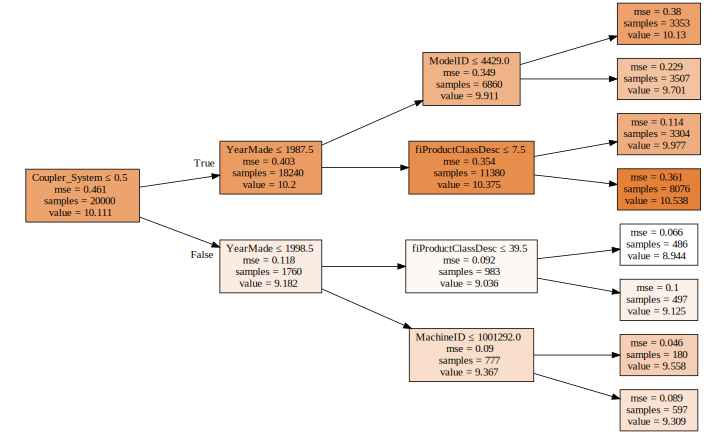

In [61]:
draw_tree(m.estimators_[0], df_trn, precision=3)

**Note:** Let's use more trees

In [62]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[6.526751786450488e-17, 0.48181445696036396, 1.0, 0.5854206866266358]


## Bagging

### Intro to Bagging

In [63]:

m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11208141176187826, 0.3531948483157705, 0.9727378485112042, 0.7772197460380491]


In [64]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([8.95545, 9.68034, 9.04782, 9.04782, 9.68034, 9.54681, 9.07681, 9.10498, 9.39266, 9.15905]),
 9.269208946037423,
 9.104979856318357)

In [65]:
preds.shape

(10, 12000)

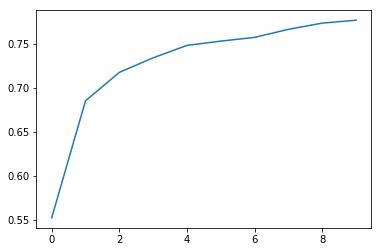

In [66]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [67]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10267421602967969, 0.3526342783192159, 0.977122122383615, 0.7779263521654949]


In [68]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09604072812935509, 0.3406312987484602, 0.9799827769062157, 0.792786963559057]


In [69]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09373918803403163, 0.33603227026699545, 0.9809306751903218, 0.7983445582142077]


## Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [70]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0965322947861492, 0.343454944776035, 0.9797773436234618, 0.7893373608219387, 0.8562217615448486]


## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [0]:
set_rf_samples(20000)

In [73]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 10.3 s, sys: 218 ms, total: 10.5 s
Wall time: 7.13 s
[0.24079490595719608, 0.2776513774718032, 0.878820427413855, 0.8623273605298143, 0.8661585130554651]


In [74]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22709730410009238, 0.2631743034924529, 0.8922148864798002, 0.8763099006287229, 0.8806711187394662]


## Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [0]:
reset_rf_samples()

In [0]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [77]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07834060291074872, 0.2355850189887187, 0.9871734858317691, 0.9008841034293589, 0.9085691771127484]


In [0]:
t=m.estimators_[0].tree_

In [79]:
dectree_max_depth(t)

45

In [80]:
%%time
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14063070807456293, 0.2332095691403352, 0.9586671689399485, 0.9028728361958237, 0.9072145295888926]
CPU times: user 5min 17s, sys: 993 ms, total: 5min 18s
Wall time: 2min 47s


In [0]:
t=m.estimators_[0].tree_

In [82]:
dectree_max_depth(t)

38

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [83]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


[0.1151063209419712, 0.23327293495402457, 0.972309348599201, 0.902820047813944, 0.908505883333649]


We can't compare our results directly with the Kaggle competition, since it used a different validation set (and we can no longer to submit to this competition) - but we can at least see that we're getting similar results to the winners based on the dataset we have.

The sklearn docs show an example of different max_features methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:

## End